In [2]:
import os
os.getcwd()
os.chdir('/Users/jaehyun/Desktop/OC22/ocp')

In [3]:
import pickle
with open("../meta_data/oc20_data_mapping.pkl","rb") as fr:
    mapping_data = pickle.load(fr)
with open("../meta_data/oc20_ref.pkl","rb") as fr:
    ref_data = pickle.load(fr)
with open("../meta_data/mapping_adslab_slab.pkl","rb") as fr:
    adslab_data = pickle.load(fr)
with open("../meta_data/oc22_metadata.pkl","rb") as fr:
    oc22_data = pickle.load(fr)

In [4]:
i = 'random82'

In [5]:
ref_data[i]

-470.825225855

In [6]:
mapping_data[i]

{'bulk_id': 240,
 'ads_id': 77,
 'bulk_mpid': 'mp-570483',
 'bulk_symbols': 'V10Si6',
 'ads_symbols': '*N',
 'miller_index': (2, 1, 1),
 'shift': 0.0,
 'top': True,
 'adsorption_site': ((2.05, 2.62, 22.05),),
 'class': 1,
 'anomaly': 0}

### Trajectory -> get energy

In [8]:
import ase.io

In [163]:
os.chdir('/Users/jaehyun/Desktop/OC22/ocp')

In [165]:
# 디렉토리 내 파일 가져오기
import os
import lzma
path = '/Users/jaehyun/Desktop/OC22/raw_data/N/N'

file_list = os.listdir(path)
file_list_xz = [file for file in file_list if file.endswith(".xz")]
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]
#print("file_list.py : {}".format(file_list_extxyz))

In [172]:
# Extract all xz files in path
os.chdir('/Users/jaehyun/Desktop/OC22/raw_data/N/N')
for xz_file in file_list_xz[:]:
    file = xz_file.split(".xz")[0] #random<xyz>.extxyz
    if not os.path.isfile(file): 
        with lzma.open(xz_file) as f, open(file,'wb') as fout:
            file_content = f.read()
            fout.write(file_content)
        f.close()
        fout.close()

In [173]:
file_list = os.listdir(path)
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]
len(file_list_extxyz)

12123

In [152]:
## Every step
# trajectory = ase.io.read("random82.extxyz",":")
# reference_energy = -470.825225855 # ref_data["random82"]
# per_step_adsorption_energies = [atoms.get_potential_energy() - reference_energy for atoms in trajectory]
# per_step_adsorption_energies[-1]

In [153]:
## Only the last step
# trajectory = ase.io.read("random82.extxyz","-1:")
# reference_energy = -470.825225855 # ref_data["random82"]
# per_step_adsorption_energies = [atoms.get_potential_energy() - reference_energy for atoms in trajectory]
# per_step_adsorption_energies[-1]

In [ ]:
databases = {}
database_N = {}
databases["N"] = database_N

In [201]:
# *N
count = 0
for file in file_list_extxyz:
    id = file.split('.')[0]
    database_N[id] = mapping_data[id]
    reference_energy = ref_data[id]
    trajectory = ase.io.read(file,"-1:") # read only last image
    database_N[id]['adsorption_energy'] = trajectory[-1].get_potential_energy() - reference_energy 
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [262]:
path = '/Users/jaehyun/Desktop/OC22/raw_data/'
os.chdir(path)
df = pd.DataFrame.from_dict(data=databases['N'],orient='index')

In [263]:
df.head()

bulk_id  ads_id  bulk_mpid bulk_symbols ads_symbols  \
random337106       877      77   mp-30856        ZnPt3          *N   
random1662052     7907      77  mp-569132   K12In4Cl24          *N   
random970879      2499      77  mp-569624       Hf4Cr8          *N   
random20679       1247      77    mp-2648         S2Nb          *N   
random1655088      338      77   mp-30336       Al12W3          *N   

              miller_index  shift    top         adsorption_site  class  \
random337106     (1, 0, 0)  0.250   True  ((1.71, 2.25, 20.81),)      0   
random1662052    (1, 0, 0)  0.133  False   ((7.92, 1.89, 24.9),)      3   
random970879    (2, -1, 2)  0.013   True  ((0.46, 4.05, 21.16),)      0   
random20679      (1, 1, 1)  0.256   True  ((7.21, 1.92, 17.88),)      2   
random1655088    (1, 1, 1)  0.192   True  ((3.56, 0.24, 25.99),)      0   

               anomaly  adsorption_energy  
random337106         0           2.222569  
random1662052        0           5.098308  
random970879         0          -2.106826  
random20679          0           2.100075  
random1655088        0          -0.778344

In [264]:
df = pd.DataFrame.from_dict(data=databases['N'],orient='index').to_csv('N_raw_data.csv')

# *NH

In [223]:
database_NH = {}
databases["NH"] = database_NH

In [205]:
# 디렉토리 내 파일 가져오기
import os
import lzma
path = '/Users/jaehyun/Desktop/OC22/raw_data/NH/NH'

file_list = os.listdir(path)
file_list_xz = [file for file in file_list if file.endswith(".xz")]
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]
#print("file_list.py : {}".format(file_list_extxyz))

In [216]:
# Extract all xz files in path
len(file_list_xz)
count = 0
total_files = len(file_list_xz)
os.chdir('/Users/jaehyun/Desktop/OC22/raw_data/NH/NH')
for xz_file in file_list_xz[:]:
    file = xz_file.split(".xz")[0] #random<xyz>.extxyz
    if not os.path.isfile(file): 
        with lzma.open(xz_file) as f, open(file,'wb') as fout:
            file_content = f.read()
            fout.write(file_content)
        f.close()
        fout.close()
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [224]:
# *NH
count = 0
path = '/Users/jaehyun/Desktop/OC22/raw_data/NH/NH'
file_list = os.listdir(path)
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]

for file in file_list_extxyz:
    id = file.split('.')[0]
    database_NH[id] = mapping_data[id]
    reference_energy = ref_data[id]
    trajectory = ase.io.read(file,"-1:") # read only last image
    database_NH[id]['adsorption_energy'] = trajectory[-1].get_potential_energy() - reference_energy 
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


## NHNH

In [243]:
database_NHNH = {}
databases["NHNH"] = database_NHNH

In [244]:
# 디렉토리 내 파일 가져오기
import os
import lzma
path = '/Users/jaehyun/Desktop/OC22/raw_data/NHNH/NHNH'

file_list = os.listdir(path)
file_list_xz = [file for file in file_list if file.endswith(".xz")]
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]
#print("file_list.py : {}".format(file_list_extxyz))

In [246]:
# Extract all xz files in path
len(file_list_xz)
count = 0
total_files = len(file_list_xz)
os.chdir('/Users/jaehyun/Desktop/OC22/raw_data/NHNH/NHNH')
for xz_file in file_list_xz[:]:
    file = xz_file.split(".xz")[0] #random<xyz>.extxyz
    if not os.path.isfile(file): 
        with lzma.open(xz_file) as f, open(file,'wb') as fout:
            file_content = f.read()
            fout.write(file_content)
        f.close()
        fout.close()
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [247]:
# *NHNH
count = 0
path = '/Users/jaehyun/Desktop/OC22/raw_data/NHNH/NHNH'
file_list = os.listdir(path)
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]

for file in file_list_extxyz:
    id = file.split('.')[0]
    database_NHNH[id] = mapping_data[id]
    reference_energy = ref_data[id]
    trajectory = ase.io.read(file,"-1:") # read only last image
    database_NHNH[id]['adsorption_energy'] = trajectory[-1].get_potential_energy() - reference_energy 
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [255]:
df = pd.DataFrame.from_dict(data=databases['NHNH'],orient='index')

In [256]:
df.head()

bulk_id  ads_id   bulk_mpid bulk_symbols ads_symbols  \
random1016757     1432      63     mp-7234      N12Nb10       *NHNH   
random1864720     2125      63     mp-8200        P8Ag4       *NHNH   
random2072426     9628      63   mp-675009    Y8Cu2Te16       *NHNH   
random1460980     1643      63  mp-1062804        TiAu2       *NHNH   
random925211       119      63   mp-622209      Al12Ni4       *NHNH   

              miller_index  shift   top          adsorption_site  class  \
random1016757    (1, 0, 1)  0.192  True   ((2.95, 6.31, 21.72),)      2   
random1864720    (2, 1, 2)  0.032  True   ((3.71, 5.77, 25.35),)      2   
random2072426    (1, 0, 0)  0.667  True   ((3.77, 5.92, 22.33),)      1   
random1460980    (1, 0, 1)  0.000  True   ((2.41, 2.69, 20.63),)      0   
random925211     (2, 1, 0)  0.101  True  ((12.96, 4.15, 20.89),)      0   

               anomaly  adsorption_energy  
random1016757        0          -0.083158  
random1864720        0           0.829307  
random2072426        3          -0.330278  
random1460980        0          -1.036252  
random925211         1          -3.284527

In [265]:
df = pd.DataFrame.from_dict(data=databases['NHNH'],orient='index').to_csv('NHNH_raw_data.csv')

## NH2

In [266]:
database_NH2 = {}
databases["NH2"] = database_NH2

In [267]:
# 디렉토리 내 파일 가져오기
import os
import lzma
path = '/Users/jaehyun/Desktop/OC22/raw_data/NH2/NH2'

file_list = os.listdir(path)
file_list_xz = [file for file in file_list if file.endswith(".xz")]
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]
#print("file_list.py : {}".format(file_list_extxyz))

In [268]:
len(file_list_xz)

8842

In [269]:
# Extract all xz files in path
count = 0
total_files = len(file_list_xz)
os.chdir('/Users/jaehyun/Desktop/OC22/raw_data/NH2/NH2')
for xz_file in file_list_xz[:]:
    file = xz_file.split(".xz")[0] #random<xyz>.extxyz
    if not os.path.isfile(file): 
        with lzma.open(xz_file) as f, open(file,'wb') as fout:
            file_content = f.read()
            fout.write(file_content)
        f.close()
        fout.close()
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [270]:
# *NH2
count = 0
path = '/Users/jaehyun/Desktop/OC22/raw_data/NH2/NH2'
file_list = os.listdir(path)
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]

for file in file_list_extxyz:
    id = file.split('.')[0]
    database_NH2[id] = mapping_data[id]
    reference_energy = ref_data[id]
    trajectory = ase.io.read(file,"-1:") # read only last image
    database_NH2[id]['adsorption_energy'] = trajectory[-1].get_potential_energy() - reference_energy 
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [272]:
df = pd.DataFrame.from_dict(data=databases['NH2'],orient='index')

In [273]:
df

bulk_id  ads_id   bulk_mpid bulk_symbols ads_symbols  \
random244710       106      71  mp-1186055         Na20        *NH2   
random2560178      608      71   mp-505071      Pd36Si8        *NH2   
random2297002     4967      71    mp-17148  Na12Ga4Se12        *NH2   
random2533055     7176      71   mp-978853     SrGe2Ir2        *NH2   
random2529220     4166      71     mp-5967       TiCoSb        *NH2   
...                ...     ...         ...          ...         ...   
random371686       692      71    mp-21276          SPb        *NH2   
random1288706     5730      71  mp-1102040    Ca4Sn4Pt4        *NH2   
random2241580     1341      71   mp-864754       Na2In6        *NH2   
random2549646     9216      71  mp-1216670       TiVAs2        *NH2   
random2571449    11471      71   mp-866169       KTl2Bi        *NH2   

              miller_index  shift    top          adsorption_site  class  \
random244710     (2, 1, 0)  0.015  False   ((0.59, 2.74, 26.65),)      0   
random2560178    (1, 1, 1)  0.006  False   ((6.89, 2.72, 33.64),)      1   
random2297002   (2, 0, -1)  0.027   True  ((4.34, 10.31, 15.91),)      2   
random2533055    (2, 0, 1)  0.095  False   ((2.13, 11.15, 16.4),)      1   
random2529220    (1, 1, 1)  0.125   True   ((4.44, 1.45, 21.31),)      1   
...                    ...    ...    ...                      ...    ...   
random371686     (1, 1, 0)  0.125   True   ((4.29, 3.03, 22.12),)      2   
random1288706    (0, 1, 1)  0.157  False    ((5.88, 3.11, 23.2),)      0   
random2241580    (1, 0, 0)  0.000   True    ((4.17, 7.07, 24.2),)      0   
random2549646    (1, 0, 1)  0.455   True    ((1.35, 7.9, 18.65),)      1   
random2571449    (2, 1, 0)  0.042   True   ((6.58, 6.34, 22.68),)      0   

               anomaly  adsorption_energy  
random244710         0          -1.078775  
random2560178        0          -0.495150  
random2297002        3           0.034990  
random2533055        0          -0.690412  
random2529220        0          -2.144030  
...                ...                ...  
random371686         0           1.369098  
random1288706        0          -2.135634  
random2241580        0          -0.225524  
random2549646        0          -3.840973  
random2571449        0          -0.127360  

[8842 rows x 12 columns]

In [274]:
path = '/Users/jaehyun/Desktop/OC22/raw_data'
os.chdir(path)
df = pd.DataFrame.from_dict(data=databases['NH2'],orient='index').to_csv('NH2_raw_data.csv')

### NH3

In [276]:
database_NH3 = {}
databases["NH3"] = database_NH3

In [277]:
# 디렉토리 내 파일 가져오기
import os
import lzma
path = '/Users/jaehyun/Desktop/OC22/raw_data/NH3/NH3'

file_list = os.listdir(path)
file_list_xz = [file for file in file_list if file.endswith(".xz")]
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]
#print("file_list.py : {}".format(file_list_extxyz))

In [278]:
len(file_list_xz)

7944

In [279]:
# Extract all xz files in path
count = 0
total_files = len(file_list_xz)
os.chdir('/Users/jaehyun/Desktop/OC22/raw_data/NH3/NH3')
for xz_file in file_list_xz[:]:
    file = xz_file.split(".xz")[0] #random<xyz>.extxyz
    if not os.path.isfile(file): 
        with lzma.open(xz_file) as f, open(file,'wb') as fout:
            file_content = f.read()
            fout.write(file_content)
        f.close()
        fout.close()
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [280]:
# *NH3
count = 0
path = '/Users/jaehyun/Desktop/OC22/raw_data/NH3/NH3'
file_list = os.listdir(path)
file_list_extxyz = [file for file in file_list if file.endswith(".extxyz")]

for file in file_list_extxyz:
    id = file.split('.')[0]
    database_NH3[id] = mapping_data[id]
    reference_energy = ref_data[id]
    trajectory = ase.io.read(file,"-1:") # read only last image
    database_NH3[id]['adsorption_energy'] = trajectory[-1].get_potential_energy() - reference_energy 
    count +=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [281]:
df = pd.DataFrame.from_dict(data=databases['NH3'],orient='index')

In [282]:
df.head()

bulk_id  ads_id  bulk_mpid bulk_symbols ads_symbols  \
random1616248     1770      72   mp-11288       Ca6Hg4        *NH3   
random1965869     1688      72    mp-1264        CdAu3        *NH3   
random842327       798      72     mp-952        MoPt2        *NH3   
random585661       724      72   mp-16315       Ge2Pt6        *NH3   
random1624368     1191      72  mp-571262       Ca2Rh4        *NH3   

              miller_index  shift    top         adsorption_site  class  \
random1616248    (1, 1, 0)  0.101  False  ((0.85, 5.46, 23.04),)      0   
random1965869    (2, 1, 0)  0.083  False   ((2.12, 7.69, 26.9),)      0   
random842327     (1, 1, 1)  0.041   True  ((2.65, 6.84, 21.69),)      0   
random585661     (1, 1, 2)  0.014   True   ((5.79, 1.0, 22.76),)      1   
random1624368    (2, 1, 0)  0.021  False  ((-1.52, 7.49, 23.8),)      0   

               anomaly  adsorption_energy  
random1616248        0          -1.412339  
random1965869        0          -1.168083  
random842327         0          -2.133238  
random585661         0          -2.271492  
random1624368        0          -1.459111

In [284]:
path = '/Users/jaehyun/Desktop/OC22/raw_data/'
os.chdir(path)
df.to_csv('NH3_raw_data.csv')

## to CSV

In [225]:
databases['NH']

{'random838339': {'bulk_id': 2751,
  'ads_id': 74,
  'bulk_mpid': 'mp-12110',
  'bulk_symbols': 'RuTa',
  'ads_symbols': '*NH',
  'miller_index': (1, 0, 0),
  'shift': 0.25,
  'top': False,
  'adsorption_site': ((0.0, 2.43, 19.96),),
  'class': 0,
  'anomaly': 0,
  'adsorption_energy': -4.349382934999994},
 'random2441374': {'bulk_id': 11124,
  'ads_id': 74,
  'bulk_mpid': 'mp-139',
  'bulk_symbols': 'Sr2',
  'ads_symbols': '*NH',
  'miller_index': (1, 0, 0),
  'shift': 0.0,
  'top': True,
  'adsorption_site': ((1.24, 8.06, 19.49),),
  'class': 0,
  'anomaly': 0,
  'adsorption_energy': -1.559122405},
 'random5144': {'bulk_id': 1770,
  'ads_id': 74,
  'bulk_mpid': 'mp-11288',
  'bulk_symbols': 'Ca6Hg4',
  'ads_symbols': '*NH',
  'miller_index': (2, 1, 1),
  'shift': 0.107,
  'top': False,
  'adsorption_site': ((3.6, 4.82, 20.29),),
  'class': 0,
  'anomaly': 0,
  'adsorption_energy': -0.878953905000003},
 'random1520936': {'bulk_id': 1874,
  'ads_id': 74,
  'bulk_mpid': 'mp-1331',
  'bu

In [237]:
import pandas as pd

Exception ignored in: <function tqdm.__del__ at 0x7fb99127b9d0>
Traceback (most recent call last):
  File "/Users/jaehyun/Library/Python/3.8/lib/python/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/Users/jaehyun/Library/Python/3.8/lib/python/site-packages/tqdm/notebook.py", line 288, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


In [242]:
df = pd.DataFrame.from_dict(data=databases['NH'],orient='index').to_csv('NH_raw_data.csv')

In [235]:
for key, value in databases['NH'].items():
    for k, v in value.items():
        print([v])

[2751]
[74]
['mp-12110']
['RuTa']
['*NH']
[(1, 0, 0)]
[0.25]
[False]
[((0.0, 2.43, 19.96),)]
[0]
[0]
[-4.349382934999994]
[11124]
[74]
['mp-139']
['Sr2']
['*NH']
[(1, 0, 0)]
[0.0]
[True]
[((1.24, 8.06, 19.49),)]
[0]
[0]
[-1.559122405]
[1770]
[74]
['mp-11288']
['Ca6Hg4']
['*NH']
[(2, 1, 1)]
[0.107]
[False]
[((3.6, 4.82, 20.29),)]
[0]
[0]
[-0.878953905000003]
[1874]
[74]
['mp-1331']
['YCd2']
['*NH']
[(1, 0, 2)]
[0.25]
[True]
[((2.56, 0.5, 22.26),)]
[0]
[0]
[-2.0583387949999974]
[3207]
[74]
['mp-1223831']
['In2S3']
['*NH']
[(1, 1, 2)]
[0.2]
[True]
[((6.27, 9.73, 23.19),)]
[2]
[0]
[0.39656264500001726]
[1230]
[74]
['mp-1973']
['Ga3Nb']
['*NH']
[(2, 2, 1)]
[0.031]
[True]
[((10.91, 11.1, 18.92),)]
[0]
[0]
[-0.9911671950000027]
[6646]
[74]
['mp-977347']
['Hf10Al6N2']
['*NH']
[(1, 0, 2)]
[0.208]
[True]
[((6.19, 3.18, 24.63),)]
[2]
[0]
[-2.3727736649999542]
[1140]
[74]
['mp-556597']
['In6S8']
['*NH']
[(1, 0, 0)]
[0.12]
[False]
[((5.15, 3.39, 20.09),)]
[2]
[0]
[1.0584143650000044]
[7873]
[74]
['

In [228]:
import csv
path = '/Users/jaehyun/Desktop/OC22/raw_data/'
os.chdir(path)
with open('NH.csv','w') as f:
    w = csv.writer(f)
    w.writerow(databases['NH'].keys())
    w.writerow(databases['NH'].values())

ValueError: x and y must have same first dimension, but have shapes (1,) and (41,)

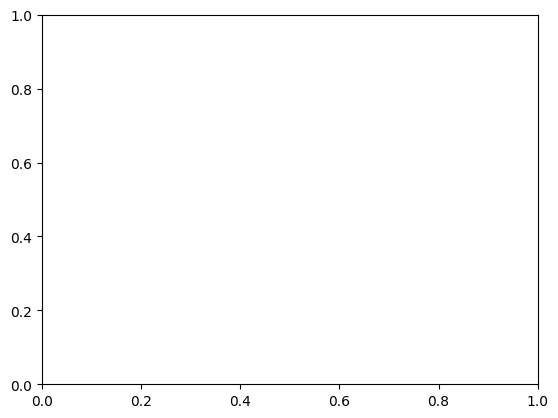

In [203]:
# Plot
import matplotlib.pyplot as plt
x = range(0,len(trajectory))
plt.plot(x,per_step_adsorption_energies)
plt.show()
